In [1]:
import quimb.tensor as qtn
import tnmpa.solvers.quimb_vbp as qbp
import numpy as np

In [2]:
from tnmpa.models.mis import MIS

In [3]:
alpha = 1.9

# number of variables
N = 30

# numer of clauses
M = int(alpha * N)
mu = 10.1

In [4]:
mis = MIS(N, M, mu = mu)

In [5]:
tn = mis.hyper_tn()

In [11]:
if N < 70:
    print(np.log(tn.contract(output_inds=())) / N)

5.876512679483951


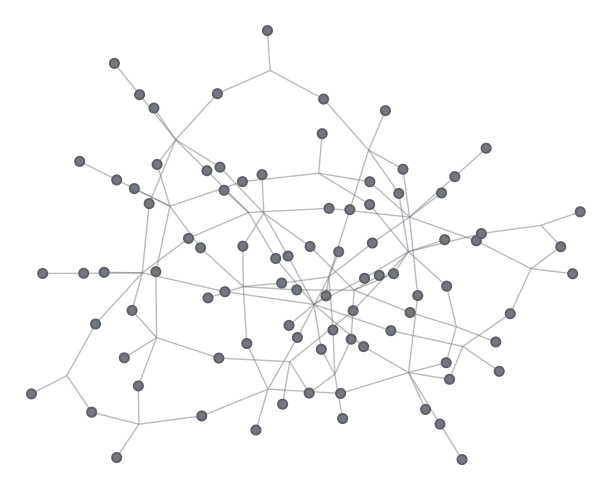

In [7]:
if N < 70:
    tn.draw()

In [8]:
messages, converged = qbp.run_belief_propagation(
    tn, 
    tol=1e-14,
    max_iterations=1000, 
    progbar=True,
    # you can parallelize but its not super efficient
    thread_pool=8,
)

3.3861802251067274e-15:   4%|▍         | 39/1000 [00:00<00:03, 263.12it/s]


In [9]:
qbp.compute_free_entropy_from_messages(tn, messages) / N

5.876514544263828

In [14]:
config, tnc, omega = qbp.sample_belief_propagation(
    tn, progbar=True, 
    thread_pool=8,
    bias=True,
)

v17->0: 100%|██████████| 20/20 [00:00<00:00, 100.59it/s]
